In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

## Exploratory Data Analysis

In [3]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
red.shape

(1599, 12)

In [6]:
white.shape

(4898, 12)

In [7]:
'There are {} less red wines in the data sample than whites. That creates a {:.2f} proportion in the data'.format(red.shape[0] - white.shape[0],(red.shape[0]/ (white.shape[0]+red.shape[0])*100))

'There are -3299 less red wines in the data sample than whites. That creates a 24.61 proportion in the data'

In [8]:
## Lets look at the null values in the dataset and combine them to see if we will need to clear any values.
df_na = pd.DataFrame(red.isna().sum(), columns=['Red_NA'])
df_na['White_NA'] = white.isna().sum().values
df_na

,Red_NA,White_NA
fixed acidity,0,0
volatile acidity,0,0
citric acid,0,0
residual sugar,0,0
chlorides,0,0
free sulfur dioxide,0,0
total sulfur dioxide,0,0
density,0,0
pH,0,0
sulphates,0,0


## Combining the two dataset for easier EDA

In [9]:
white['type'] = 0
red['type'] = 1
wine_df = pd.concat([white, red])
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [10]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


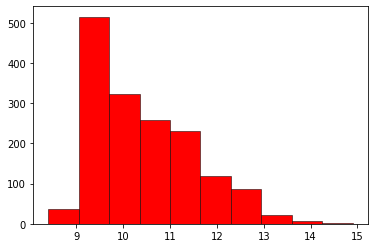

In [11]:
plt.hist(wine_df.alcohol[wine_df.type==1],10, color='red',lw=0.5,ec='black')
plt.set_xlabel = '% Alcohol'
plt.set_ylabel = 'Frequency'
plt.show()

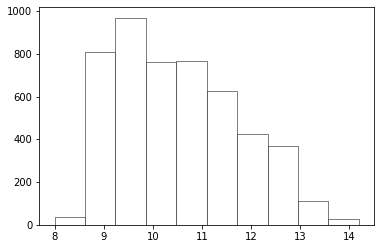

In [12]:
plt.hist(wine_df.alcohol[wine_df.type==0],10, color='white',lw=0.5, ec='black')
plt.show()

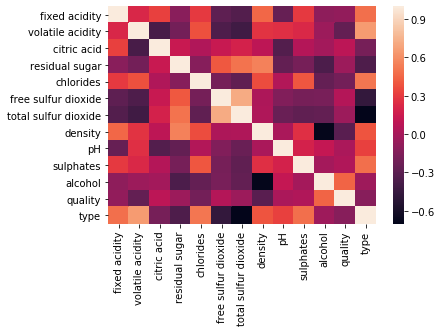

In [13]:
## A correlation plot can help us identify a feature with a strong correlation to our type
import seaborn as sns
corr = wine_df.corr()
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)


### Based on the data [Volitile Acidity, Total Sulfur Dioxide] are the strongest.
### Next we will split the data into out feature and Target sets using X and y

In [14]:
X = wine_df.iloc[:,0:11]
y = np.ravel(wine_df.type)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [15]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [16]:
from sklearn.feature_selection import SelectKBest, chi2
sel = SelectKBest(chi2,k=3)
sel.fit_transform(X,y)

array([[ 20.7,  45. , 170. ],
       [  1.6,  14. , 132. ],
       [  6.9,  30. ,  97. ],
       ...,
       [  2.3,  29. ,  40. ],
       [  2. ,  32. ,  44. ],
       [  3.6,  18. ,  42. ]])

In [17]:
sel.transform(X).shape

(6497, 3)

We can see that we have 3 columns remaining in the dataset after using feature selection.\
By looking a the np array that remains it looks as if we will only use "Residual Sugar", "Free Sulfur Dioxide" and "Total Sulful Dioxide".

In [18]:
col = ['residual sugar','free sulfur dioxide','total sulfur dioxide']
X = wine_df[col]
print(X.shape)
X.head()

(6497, 3)


,residual sugar,free sulfur dioxide,total sulfur dioxide
0,20.7,45.0,170.0
1,1.6,14.0,132.0
2,6.9,30.0,97.0
3,8.5,47.0,186.0
4,8.5,47.0,186.0


## Minimizing the range of values using a Standard Scalar

In [19]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scale = scaler.fit_transform(X)
# X_scale

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)

(4352, 3)
(2145, 3)


In [22]:
print('Class Imbalance of RED: {:.2f}'.format(
    sum(y_train==1)/(sum(y_train==0)+sum(y_train==1))))

Class Imbalance of RED: 0.25


In [23]:
## For Visual purposes of the dataset
## You can see that the dataset has been Scaled to a Standard
X_train.head()

,residual sugar,free sulfur dioxide,total sulfur dioxide
1700,1.8,25.0,121.0
301,1.5,7.0,15.0
3340,1.2,19.0,125.0
86,11.0,55.0,156.0
689,1.8,5.0,17.0


## Constructing the Sequential NN

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

C:\Users\jared.rentz\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [25]:
model = Sequential()
model.add(Dense(3,activation='relu',input_shape=(3,)))
# model.add(Dense(32,activation='relu'))
# model.add(Dense(24,activation='relu'))
# model.add(Dense(12,activation='relu'))
# model.add(Dense(6,activation='relu'))
model.add(Dense (1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

W0819 13:45:10.936698 17412 deprecation_wrapper.py:119] From C:\Users\jared.rentz\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 13:45:10.973380 17412 deprecation_wrapper.py:119] From C:\Users\jared.rentz\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 13:45:10.977400 17412 deprecation_wrapper.py:119] From C:\Users\jared.rentz\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 13:45:11.038203 17412 deprecation_wrapper.py:119] From C:\Users\jared.rentz\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,
         y_train,
         epochs=40,
         validation_split= 0.2,
         shuffle=True,
         class_weight={1:4,0:1},
        callbacks=False
         )

W0819 13:45:11.302541 17412 deprecation_wrapper.py:119] From C:\Users\jared.rentz\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3481 samples, validate on 871 samples
Epoch 1/40
3481/3481 [==============================] - 0s 129us/step - loss: 6.8573 - acc: 0.6688 - val_loss: 2.2748 - val_acc: 0.6028
Epoch 2/40
3481/3481 [==============================] - 0s 44us/step - loss: 1.7802 - acc: 0.6788 - val_loss: 1.6290 - val_acc: 0.7761
Epoch 3/40
3481/3481 [==============================] - 0s 42us/step - loss: 1.4803 - acc: 0.7162 - val_loss: 1.3327 - val_acc: 0.6854
Epoch 4/40
3481/3481 [==============================] - 0s 42us/step - loss: 1.2898 - acc: 0.7449 - val_loss: 1.2873 - val_acc: 0.8232
Epoch 5/40
3481/3481 [==============================] - 0s 40us/step - loss: 1.2165 - acc: 0.7627 - val_loss: 1.1311 - val_acc: 0.6992
Epoch 6/40
3481/3481 [==============================] - 0s 41us/step - loss: 1.1293 - acc: 0.7805 - val_loss: 1.0280 - val_acc: 0.8197
Epoch 7/40
3481/3481 [==============================] - 0s 40us/step - loss: 1.0843 - acc: 0.7871 - val_loss: 1.0869 - val_acc: 0.8806
Epoch 8

In [27]:
model.evaluate(
    X_test,
    y_test)

2145/2145 [==============================] - 0s 18us/step


[0.2509074565683142, 0.9268065268065268]

In [29]:
data = np.array([[3.6,18,42]])
print('Wine Color: {}, it was predicted with a {:.2f}% probability.'.format('Red' if model.predict_classes(data)[0][0]== 1 else 'White',model.predict_proba(data)[0][0]*100))

Wine Color: Red, it was predicted with a 67.66% probability.
